In [1]:
import matplotlib.pyplot as plt
import sys
from PIL import Image
import numpy as np
sys.setrecursionlimit(50000)
%matplotlib inline
import colorsys
from copy import copy, deepcopy
from sklearn.cluster import MiniBatchKMeans

In [2]:
def read_img(filename):
    im=Image.open(filename)
    return im
    
def to_matrix(img):
    img = img.convert('L')
    bw = np.asarray(img).copy()
    return bw
    #bwf = bw.flatten();

In [3]:
filename = "fly2.jpg"
clusters = {
    "red" : [200, 0, 0],
    "green" : [130, 255, 0],
    "white" : [255, 255, 255],
    #"yellow" : [250, 240, 0],
    "black" : [0, 0, 0]
}


In [4]:
class DominantColors:
    
    img_row = None
    image = None
    colors = None
    labels = None
    clusters = None
    max_iterations = None
    
    def __init__(self, image, clusters=3, max_iter= 100):
        self.clusters = clusters
        self.image = image
        self.max_iterations = max_iter
        
    def dominant_colors(self):
        print("Started reshape")
        self.img_row = self.reshape_to_list(self.image)
        print("Processing: " + str(len(self.img_row)))
        kmeans = MiniBatchKMeans(n_clusters = self.clusters, max_iter = self.max_iterations, verbose=True, init='k-means++')
        print("Started fitting")
        kmeans.fit(np.array(self.img_row))
        self.colors = kmeans.cluster_centers_
        self.labels = kmeans.labels_
        return self.colors.astype(int)
    
    def reshape_to_list(self, matrix):
        result = []
        for row in matrix:
            for point in row:
                result.append(row)
        return result        
        
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plot_clusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.labels,self.img_row):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.colors[label]))
        plt.show()

In [15]:
def euclidian_diff(p1, p2):
    s = 0
    for i in range(len(p1)):
        s = s + (p1[i] - p2[i]) ** 2
    return s ** 1/2    
        
def closest(point, clusters):
    res = list(clusters.values())[0]
    for cluster_p in clusters.values():
        if(euclidian_diff(cluster_p, point) < euclidian_diff(res, point)):
            res = cluster_p
    return res

In [16]:
def points_diff(p_source, p_targe):
    h_s,_ ,_  = colorsys.rgb_to_hsv(p_source[0], p_source[1] , p_source[2])
    h_t,_ ,_  = colorsys.rgb_to_hsv(p_targe[0], p_targe[1] , p_targe[2])
    return abs(h_t - h_s)

def move_colour(point, h_diff):
    h, s, v = colorsys.rgb_to_hsv(point[0], point[1] , point[2])
    h_new = h + h_diff
    if(h_new > 1): h_new = h_new - 1
    return list(colorsys.hsv_to_rgb(h_new , s, v))

In [60]:
def show(img_matrix):
    arr = np.asarray(img_matrix)
    i = Image.fromarray(arr.astype('uint8'), 'RGB')
    plt.imshow(i)
    plt.show()
    
def show_colour(colour):
    colour_matrix = original = [[colour for i in range(4)] for j in range(1)]
    show(colour_matrix)

In [26]:
def change_colour(source, target, processed, original):
    result = deepcopy(original)
    diff = points_diff(source, target)
    for y in range(len(result)):
        for x in range(len(result[y])):
            point = result[y][x]
            if(processed[y][x] == source):
                result[y][x] = move_colour(point, diff)
    return result
   
def load(filename):
    img = read_img(filename)
    width, height = img.size
    image = img.load()
    original = [[[0, 0, 0] for i in range(width)] for j in range(height)]
    for y in range(height):
        for x in range(width):
            original[y][x] = list(image[x, y])
    return original 

def process(image, clusters):
    processed_img = [[[0, 0, 0] for i in range(len(image[0]))] for j in range(len(image))]
    for y in range(len(image)):
        for x in range(len(image[y])):
            processed_img[y][x] = closest(image[y][x], clusters)
    return processed_img

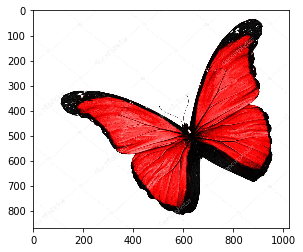

In [9]:
original = load(filename)
show(original)

In [ ]:
#clusters_n = 3;
#dom_col = DominantColors(original, clusters_n, 10)
#clusters = dom_col.dominant_colors()
#print(clusters)

In [ ]:
#dom_col.plot_clusters()

In [27]:
processed = process(original, clusters)

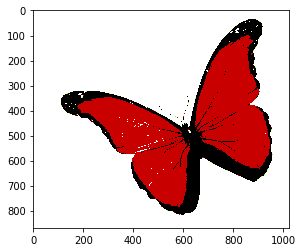

In [28]:
show(processed)

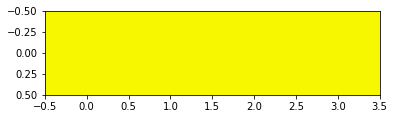

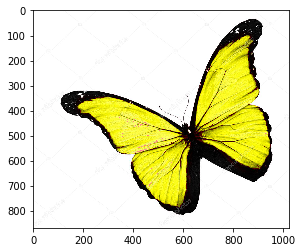

In [61]:
to_colour = [247, 247, 0]
source_colour = clusters["red"]
changed = change_colour(source_colour, to_colour, processed, original)
show_colour(to_colour)
show(changed)

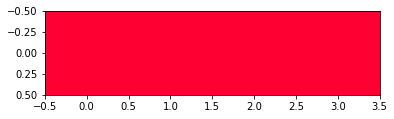

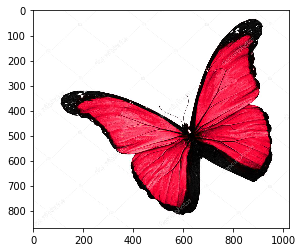

In [62]:
to_colour = [255, 0, 50]
source_colour = clusters["red"]
changed = change_colour(source_colour, to_colour, processed, original)
show_colour(to_colour)
show(changed)

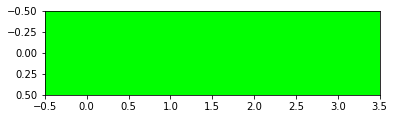

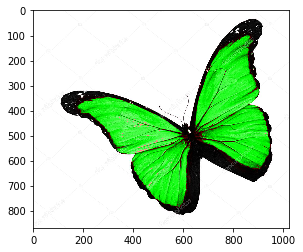

In [63]:
to_colour = [0, 255, 0]
source_colour = clusters["red"]
changed = change_colour(source_colour, to_colour, processed, original)
show_colour(to_colour)
show(changed)

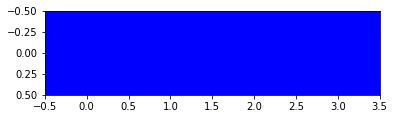

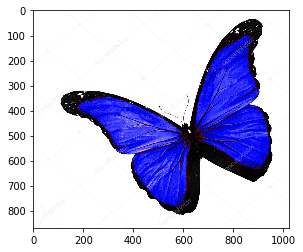

In [64]:
to_colour = [0, 0, 255]
source_colour = clusters["red"]
changed = change_colour(source_colour, to_colour, processed, original)
show_colour(to_colour)
show(changed)

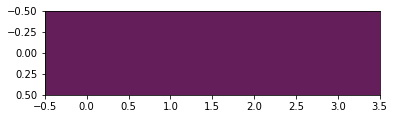

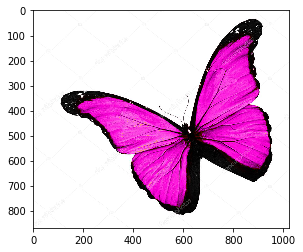

In [65]:
to_colour = [100, 30, 90]
source_colour = clusters["red"]
changed = change_colour(source_colour, to_colour, processed, original)
show_colour(to_colour)
show(changed)